# Intro

## Titlu: Analiza vanzari cafenea
## Descriere: Analizam produsele vandute, comportamentul clientilor si optimizam strategia de fidelizare pe baza tiparelor identificate

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [6]:
# loading the dataset
dataset = pd.read_csv("./cofee_fara_diacritice.csv")

dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_qty   149116 non-null  int64  
 2   store_id          149116 non-null  int64  
 3   store_location    149116 non-null  object 
 4   product_id        149116 non-null  int64  
 5   unit_price        149116 non-null  float64
 6   product_category  149116 non-null  object 
 7   product_type      149116 non-null  object 
 8   product_detail    149116 non-null  object 
 9   weekday           149116 non-null  object 
 10  time_of_day       149116 non-null  object 
 11  customer_age      149116 non-null  int64  
 12  client_type       149116 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 14.8+ MB


,transaction_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,weekday,time_of_day,customer_age,client_type
0,1,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,Dimineata,44,Fidel
1,2,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,Dimineata,33,Nou
2,3,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,Dimineata,34,Fidel
3,4,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,Dimineata,47,Fidel
4,5,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,Dimineata,38,Fidel


In [7]:

# subsampling the data set
dataset = dataset.loc[0:5000]

# removing useless columns 
dataset = dataset.drop(["transaction_id", "store_id", "product_id"], axis=1)

dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_qty   5001 non-null   int64  
 1   store_location    5001 non-null   object 
 2   unit_price        5001 non-null   float64
 3   product_category  5001 non-null   object 
 4   product_type      5001 non-null   object 
 5   product_detail    5001 non-null   object 
 6   weekday           5001 non-null   object 
 7   time_of_day       5001 non-null   object 
 8   customer_age      5001 non-null   int64  
 9   client_type       5001 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 390.8+ KB


,transaction_qty,unit_price,customer_age
count,5001.000000,5001.000000,5001.000000
mean,1.420316,3.261386,32.759048
std,0.497292,1.708449,6.833954
min,1.000000,0.800000,18.000000
25%,1.000000,2.500000,28.000000
50%,1.000000,3.000000,32.000000
75%,2.000000,3.750000,37.000000
max,4.000000,28.000000,56.000000


- Plot ce arata relatia dintre numarul de cafele cerute si tipul acestora

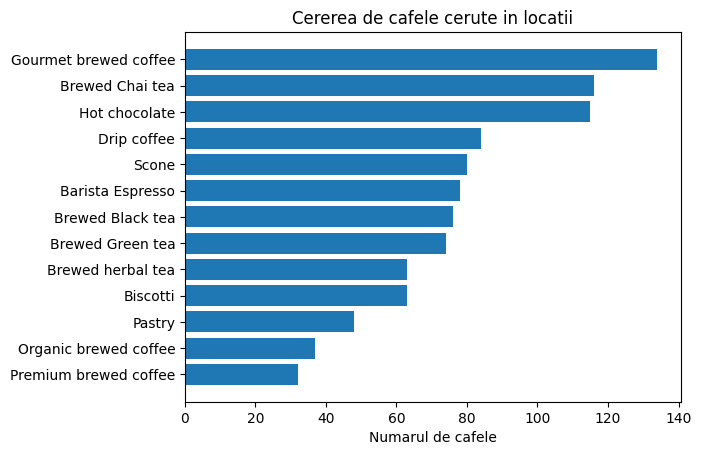

In [8]:
fig, ax = plot.subplots()

count = 1000

coffee_types = dataset["product_type"].head(count).unique()
coffe_counts = dataset["product_type"].head(count).value_counts()

ax.barh(coffee_types, coffe_counts)
ax.invert_yaxis()

ax.set_xlabel("Numarul de cafele")
ax.set_title("Cererea de cafele cerute in locatii")

plot.show()


- Plot ce arata unde sunt cele mai multe vanzari ale unui anumit tip de cafea

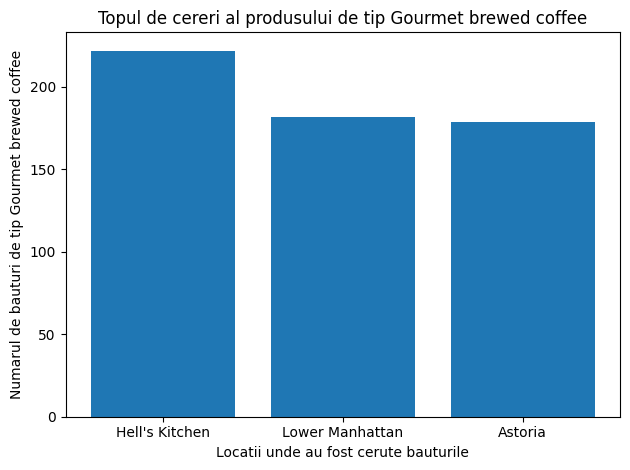

In [9]:
coffee_type = "Gourmet brewed coffee"

gourmet_df = dataset[dataset["product_type"] == coffee_type]

filtered = gourmet_df["store_location"].value_counts().reset_index()
filtered.columns = ["store_location", coffee_type]

plot.bar(filtered["store_location"], filtered[coffee_type])

plot.title(f"Topul de cereri al produsului de tip {coffee_type}")
plot.ylabel(f"Numarul de bauturi de tip {coffee_type}")
plot.xlabel("Locatii unde au fost cerute bauturile")

plot.tight_layout()

plot.show()

- Plot ce arata varsta clientiilor si tipul de produs cerut

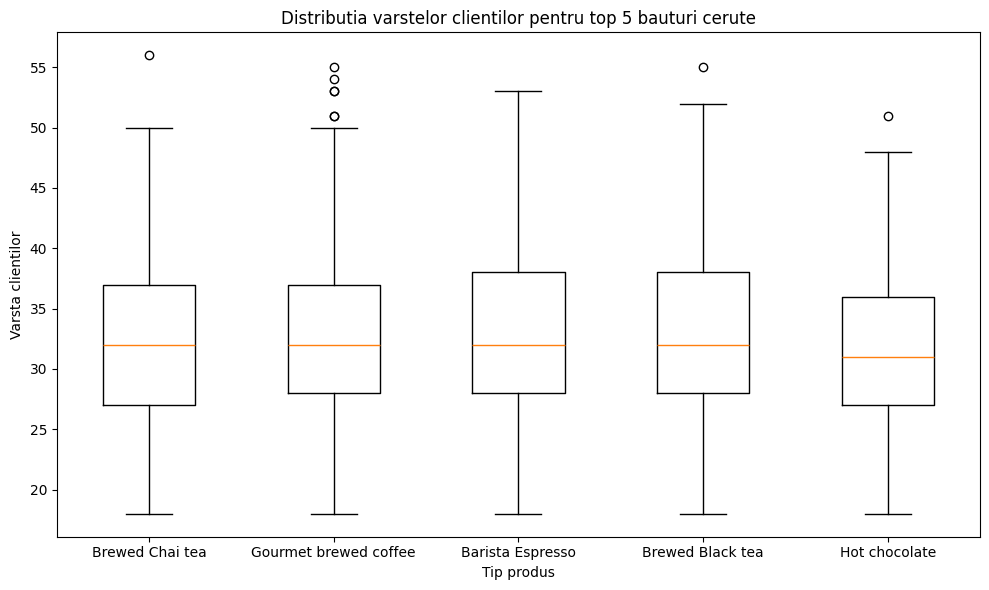

In [10]:
top_products = dataset["product_type"].value_counts().head(5).index
filtered_df = dataset[dataset["product_type"].isin(top_products)]

fig, ax = plot.subplots(figsize=(10, 6))

age_data = [filtered_df[filtered_df["product_type"] == prod]["customer_age"] for prod in top_products]

ax.boxplot(age_data, tick_labels=top_products)
ax.set_xlabel("Tip produs")
ax.set_ylabel("Varsta clientilor")
ax.set_title("Distributia varstelor clientilor pentru top 5 bauturi cerute")
plot.tight_layout()
plot.show()

- pregatim regresia liniara simpla
  - transaction qty - var dependenta
  - unit price - var independenta

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X = np.array(dataset["transaction_qty"]).reshape(-1, 1)
y = np.array(dataset["unit_price"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

model = LinearRegression()

model.fit(X_train, y_train)

# model info
R2 = model.score(X_test, y_test)
mae = mean

print(f"R^2: {R2}")



R^2: 0.021278865260814683


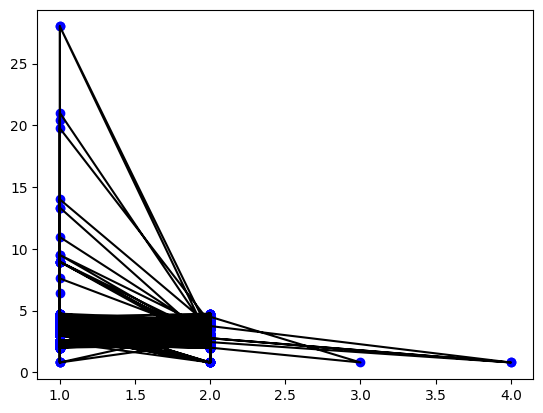

In [19]:
y_pred = model.predict(X_test)
plot.scatter(X_test, y_test, color="b")
plot.plot(X_test, y_test, color="k")

plot.show()
